# Wednesday 7th April 2021 Amari 16

In [1]:
import os 
import sys
import pickle 
import tensorflow as tf
import pandas as pd
import numpy as np
import glob 
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
from tensorflow.keras.layers import *
import sklearn
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

In [ ]:
# Image Shape is (28,28)

In [2]:
DATA_URL = "/tf/digit-recognizer/train.csv"
DATA_URL_TE = "/tf/digit-recognizer/test.csv"

In [3]:
df = pd.read_csv(DATA_URL)    
df_test = pd.read_csv(DATA_URL_TE)

In [4]:
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels = pd.DataFrame(df["label"])
df = df.drop("label",axis=1)

In [6]:
display(labels)

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [7]:
display(df)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


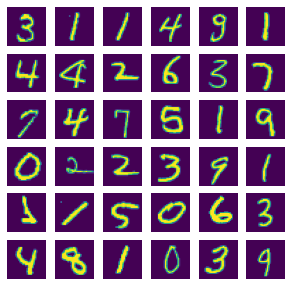

In [8]:
plt.figure(figsize=(5,5))
for i in range(0,36): # for n,i in enumerate(list(np.random.randint(0,len(df))) allows you to pick random numbers and get the index
    img = df.iloc[36+i,:].to_numpy().reshape(28,28)
    plt.subplot(6,6,i+1)
    plt.imshow(img)
    plt.axis('off')
    
    
#img1 = df.iloc[8,:].to_numpy().reshape(28,28)


In [9]:
X_train = df.values.reshape(42000,28,28,1)
X_test = df_test.values.reshape(28000,28,28,1)
y_train = labels.values.reshape(42000,1)

print(f'X_train input shape:{X_train.shape}')
print(f'X_test input shape:{X_test.shape}')


X_train input shape:(42000, 28, 28, 1)
X_test input shape:(28000, 28, 28, 1)


In [ ]:
# Model Graph Shape
#Cov2d 
#Max_pool 
#Cov2d until output is a vector or low
#Flatten 
#Dropout
# Ouput of 10 Nodes Dense (softmax)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
model = keras.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [14]:
history = model.fit(X_train,labels,validation_split=0.2,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
525/525 [==============================] - 10s 18ms/step - loss: 0.6426 - accuracy: 0.8058 - val_loss: 0.0926 - val_accuracy: 0.9727
Epoch 2/10
525/525 [==============================] - 9s 18ms/step - loss: 0.0922 - accuracy: 0.9706 - val_loss: 0.0632 - val_accuracy: 0.9806
Epoch 3/10
525/525 [==============================] - 9s 17ms/step - loss: 0.0618 - accuracy: 0.9799 - val_loss: 0.0557 - val_accuracy: 0.9823
Epoch 4/10
525/525 [==============================] - 9s 16ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0589 - val_accuracy: 0.9819
Epoch 5/10
525/525 [==============================] - 9s 16ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0461 - val_accuracy: 0.9867
Epoch 6/10
525/525 [==============================] - 9s 16ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0409 - val_accuracy: 0.9870
Epoch 7/10
525/525 [==============================] - 9s 16ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0440 - val_accuracy: 0.987

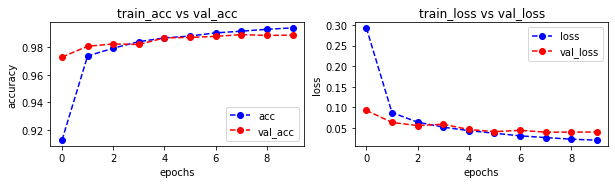

In [15]:
fig = plt.figure(figsize=(10,5))

plt.subplot(221)
plt.plot(history.history['accuracy'],'bo--', label = "acc")
plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
#fig.savefig('/tf/digit-recognizer/Model_Performance/Attempt_1/Model_performance.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [16]:
print(df.shape)

(42000, 784)


In [17]:
yhat_test = model.predict(X_test)
display(yhat_test) # This gets the softmax probabiliy predictons for the X_test

array([[2.7526375e-12, 1.9610668e-15, 1.0000000e+00, ..., 4.1967546e-10,
        2.4384423e-11, 2.0111232e-13],
       [9.9999738e-01, 8.4166879e-14, 2.3119479e-07, ..., 1.4548374e-08,
        5.8819434e-09, 4.2214771e-07],
       [2.0261546e-09, 1.7315782e-09, 6.8133528e-07, ..., 4.5937122e-06,
        4.5052566e-06, 9.9987781e-01],
       ...,
       [8.7818738e-18, 6.6332925e-15, 9.8681404e-13, ..., 7.5259882e-11,
        5.0892871e-12, 5.6770394e-10],
       [4.8803239e-10, 3.3363905e-11, 1.6425524e-09, ..., 1.0817070e-05,
        8.7696840e-08, 9.9976176e-01],
       [5.1851274e-14, 3.1834414e-15, 1.0000000e+00, ..., 1.8356823e-11,
        1.9697859e-08, 4.5005437e-11]], dtype=float32)

In [18]:
class_labels = pd.DataFrame(np.argmax(yhat_test, axis=1)) # This gets the predicted numbers as actual numbers
print(class_labels.shape)

(28000, 1)


In [19]:
score4 = model.evaluate(X_test,class_labels)
print('Test accuracy Digit_Recoginser%:', (score4[1]*100))

875/875 [==============================] - 4s 4ms/step - loss: 0.0115 - accuracy: 1.0000
Test accuracy Digit_Recoginser%: 100.0


In [20]:
X_test = X_test.reshape(28000,784)
X_test = pd.DataFrame(X_test)

In [21]:
# Predicted Lable Numbers
print(Predicted Lable Numbers:{class_labels.iloc[120,:][0]})

3


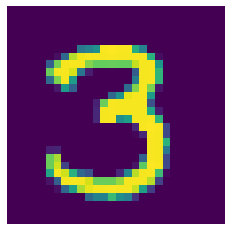

In [22]:
#Original Lable Numbers
plt.imshow(X_test.iloc[120,:].values.reshape(28,28))
plt.axis("off")
plt.show()

In [ ]:
#model.save_weights('/tf/digit-recognizer/ModelCheckpoints/Digit_Recoginser.ckpt')
#model.save('/tf/digit-recognizer/Saved_Model/Digit_Recoginser_Model.h5')

In [ ]:
# Make Confusions Matrix 
